# Flaml (Fast and Lightweight AutoML) Time Series Forecast Demo

Restart runtime after installation (ignore errors).

In [1]:
!pip3 install flaml flaml[forecast]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from flaml import AutoML

/home/vscode/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Import dataset

In [3]:
df = sns.load_dataset('flights')
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


### Preprocessing

The first column must to be continuous ```datetime64``` values

In [4]:
t = pd.to_datetime(df.year.astype('str') + '-' + df.month.astype('str'), format='%Y-%b')
df.insert(0, 'timestamp', t)
df = df.drop(['year', 'month'], axis=1)
df

,timestamp,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


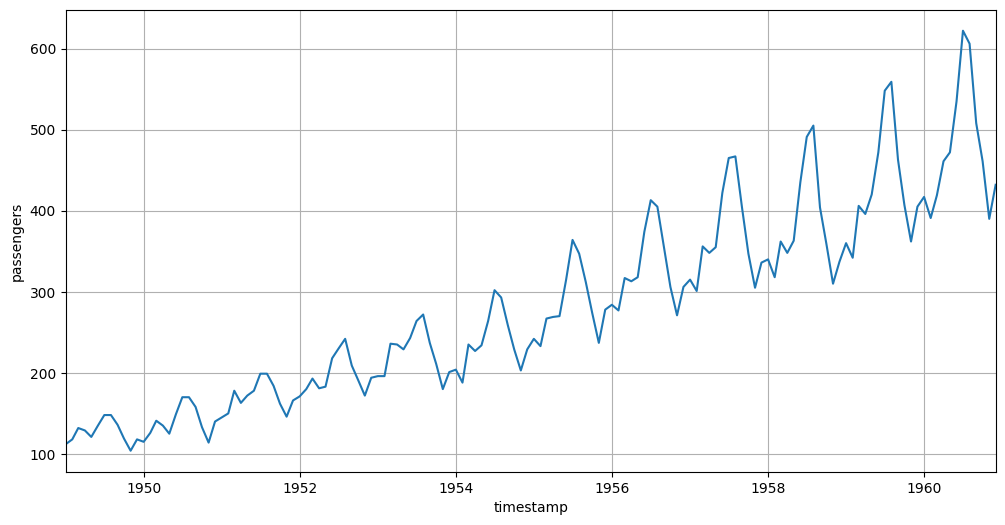

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='timestamp', y='passengers')
plt.xlim([df.timestamp[0], df.timestamp[df.index.size-1]])
plt.grid(True)
plt.show()

### Train model

Use 10% data as test dataset

In [6]:
split = 0.1
split_index = int(df.index.size*(1-split))

train, test = df[:split_index], df[split_index:].drop(['passengers'], axis=1)

In [7]:
print(train.size)
print(test.size)

258
15


In [8]:
reg = AutoML()
reg.fit(dataframe=train, label='passengers', task='ts_forecast', split_type='time', estimator_list=['prophet'], period=24, time_budget=90)

[flaml.automl.logger: 04-12 07:55:24] {1680} INFO - task = ts_forecast
[flaml.automl.logger: 04-12 07:55:24] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 04-12 07:55:24] {1789} INFO - Minimizing error metric: mape


/home/vscode/.local/lib/python3.10/site-packages/flaml/automl/task/time_series_task.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[self.time_col] = pd.to_datetime(dataframe[self.time_col])
/home/vscode/.local/lib/python3.10/site-packages/flaml/automl/time_series/ts_data.py:121: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([self.X_train, self.X_val], axis=0)
Importing plotly failed. Interactive plots will not work.


[flaml.automl.logger: 04-12 07:55:24] {1901} INFO - List of ML learners in AutoML Run: ['prophet']
[flaml.automl.logger: 04-12 07:55:24] {2219} INFO - iteration 0, current learner prophet


07:55:24 - cmdstanpy - INFO - Chain [1] start processing
07:55:26 - cmdstanpy - INFO - Chain [1] done processing
07:55:27 - cmdstanpy - INFO - Chain [1] start processing
07:55:29 - cmdstanpy - INFO - Chain [1] done processing
07:55:30 - cmdstanpy - INFO - Chain [1] start processing
07:55:30 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:55:31] {2345} INFO - Estimated sufficient time budget=75584s. Estimated necessary time budget=76s.
[flaml.automl.logger: 04-12 07:55:31] {2392} INFO -  at 7.7s,	estimator prophet's best error=0.0568,	best estimator prophet's best error=0.0568
[flaml.automl.logger: 04-12 07:55:31] {2219} INFO - iteration 1, current learner prophet


07:55:31 - cmdstanpy - INFO - Chain [1] start processing
07:55:32 - cmdstanpy - INFO - Chain [1] done processing
07:55:33 - cmdstanpy - INFO - Chain [1] start processing
07:55:34 - cmdstanpy - INFO - Chain [1] done processing
07:55:35 - cmdstanpy - INFO - Chain [1] start processing
07:55:35 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:55:36] {2392} INFO -  at 12.3s,	estimator prophet's best error=0.0568,	best estimator prophet's best error=0.0568
[flaml.automl.logger: 04-12 07:55:36] {2219} INFO - iteration 2, current learner prophet


07:55:36 - cmdstanpy - INFO - Chain [1] start processing
07:55:37 - cmdstanpy - INFO - Chain [1] done processing
07:55:38 - cmdstanpy - INFO - Chain [1] start processing
07:55:40 - cmdstanpy - INFO - Chain [1] done processing
07:55:41 - cmdstanpy - INFO - Chain [1] start processing
07:55:41 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:55:42] {2392} INFO -  at 18.4s,	estimator prophet's best error=0.0568,	best estimator prophet's best error=0.0568
[flaml.automl.logger: 04-12 07:55:42] {2219} INFO - iteration 3, current learner prophet


07:55:42 - cmdstanpy - INFO - Chain [1] start processing
07:55:43 - cmdstanpy - INFO - Chain [1] done processing
07:55:44 - cmdstanpy - INFO - Chain [1] start processing
07:55:44 - cmdstanpy - INFO - Chain [1] done processing
07:55:45 - cmdstanpy - INFO - Chain [1] start processing
07:55:45 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:55:46] {2392} INFO -  at 22.9s,	estimator prophet's best error=0.0568,	best estimator prophet's best error=0.0568
[flaml.automl.logger: 04-12 07:55:46] {2219} INFO - iteration 4, current learner prophet


07:55:47 - cmdstanpy - INFO - Chain [1] start processing
07:55:48 - cmdstanpy - INFO - Chain [1] done processing
07:55:49 - cmdstanpy - INFO - Chain [1] start processing
07:55:50 - cmdstanpy - INFO - Chain [1] done processing
07:55:52 - cmdstanpy - INFO - Chain [1] start processing
07:55:52 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:55:53] {2392} INFO -  at 29.1s,	estimator prophet's best error=0.0568,	best estimator prophet's best error=0.0568
[flaml.automl.logger: 04-12 07:55:53] {2219} INFO - iteration 5, current learner prophet


07:55:53 - cmdstanpy - INFO - Chain [1] start processing
07:55:54 - cmdstanpy - INFO - Chain [1] done processing
07:55:55 - cmdstanpy - INFO - Chain [1] start processing
07:55:57 - cmdstanpy - INFO - Chain [1] done processing
07:55:58 - cmdstanpy - INFO - Chain [1] start processing
07:55:58 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:55:59] {2392} INFO -  at 35.7s,	estimator prophet's best error=0.0561,	best estimator prophet's best error=0.0561
[flaml.automl.logger: 04-12 07:55:59] {2219} INFO - iteration 6, current learner prophet


07:55:59 - cmdstanpy - INFO - Chain [1] start processing
07:56:00 - cmdstanpy - INFO - Chain [1] done processing
07:56:01 - cmdstanpy - INFO - Chain [1] start processing
07:56:02 - cmdstanpy - INFO - Chain [1] done processing
07:56:03 - cmdstanpy - INFO - Chain [1] start processing
07:56:03 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:56:04] {2392} INFO -  at 40.6s,	estimator prophet's best error=0.0561,	best estimator prophet's best error=0.0561
[flaml.automl.logger: 04-12 07:56:04] {2219} INFO - iteration 7, current learner prophet


07:56:04 - cmdstanpy - INFO - Chain [1] start processing
07:56:05 - cmdstanpy - INFO - Chain [1] done processing
07:56:06 - cmdstanpy - INFO - Chain [1] start processing
07:56:06 - cmdstanpy - INFO - Chain [1] done processing
07:56:07 - cmdstanpy - INFO - Chain [1] start processing
07:56:07 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:56:08] {2392} INFO -  at 44.9s,	estimator prophet's best error=0.0561,	best estimator prophet's best error=0.0561
[flaml.automl.logger: 04-12 07:56:08] {2219} INFO - iteration 8, current learner prophet


07:56:08 - cmdstanpy - INFO - Chain [1] start processing
07:56:10 - cmdstanpy - INFO - Chain [1] done processing
07:56:11 - cmdstanpy - INFO - Chain [1] start processing
07:56:13 - cmdstanpy - INFO - Chain [1] done processing
07:56:14 - cmdstanpy - INFO - Chain [1] start processing
07:56:14 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:56:15] {2392} INFO -  at 51.5s,	estimator prophet's best error=0.0561,	best estimator prophet's best error=0.0561
[flaml.automl.logger: 04-12 07:56:15] {2219} INFO - iteration 9, current learner prophet


07:56:15 - cmdstanpy - INFO - Chain [1] start processing
07:56:17 - cmdstanpy - INFO - Chain [1] done processing
07:56:18 - cmdstanpy - INFO - Chain [1] start processing
07:56:19 - cmdstanpy - INFO - Chain [1] done processing
07:56:20 - cmdstanpy - INFO - Chain [1] start processing
07:56:20 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:56:21] {2392} INFO -  at 57.8s,	estimator prophet's best error=0.0561,	best estimator prophet's best error=0.0561
[flaml.automl.logger: 04-12 07:56:21] {2219} INFO - iteration 10, current learner prophet


07:56:21 - cmdstanpy - INFO - Chain [1] start processing
07:56:22 - cmdstanpy - INFO - Chain [1] done processing
07:56:23 - cmdstanpy - INFO - Chain [1] start processing
07:56:24 - cmdstanpy - INFO - Chain [1] done processing
07:56:25 - cmdstanpy - INFO - Chain [1] start processing
07:56:25 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:56:26] {2392} INFO -  at 62.1s,	estimator prophet's best error=0.0561,	best estimator prophet's best error=0.0561
[flaml.automl.logger: 04-12 07:56:26] {2219} INFO - iteration 11, current learner prophet


07:56:26 - cmdstanpy - INFO - Chain [1] start processing
07:56:27 - cmdstanpy - INFO - Chain [1] done processing
07:56:28 - cmdstanpy - INFO - Chain [1] start processing
07:56:31 - cmdstanpy - INFO - Chain [1] done processing
07:56:32 - cmdstanpy - INFO - Chain [1] start processing
07:56:32 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:56:33] {2392} INFO -  at 69.4s,	estimator prophet's best error=0.0561,	best estimator prophet's best error=0.0561
[flaml.automl.logger: 04-12 07:56:33] {2219} INFO - iteration 12, current learner prophet


07:56:33 - cmdstanpy - INFO - Chain [1] start processing
07:56:33 - cmdstanpy - INFO - Chain [1] done processing
07:56:34 - cmdstanpy - INFO - Chain [1] start processing
07:56:35 - cmdstanpy - INFO - Chain [1] done processing
07:56:36 - cmdstanpy - INFO - Chain [1] start processing
07:56:36 - cmdstanpy - INFO - Chain [1] done processing
07:56:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
07:56:36 - cmdstanpy - INFO - Chain [1] start processing
07:56:36 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:56:37] {2392} INFO -  at 73.4s,	estimator prophet's best error=0.0561,	best estimator prophet's best error=0.0561
[flaml.automl.logger: 04-12 07:56:37] {2219} INFO - iteration 13, current learner prophet


07:56:37 - cmdstanpy - INFO - Chain [1] start processing
07:56:37 - cmdstanpy - INFO - Chain [1] done processing
07:56:39 - cmdstanpy - INFO - Chain [1] start processing
07:56:39 - cmdstanpy - INFO - Chain [1] done processing
07:56:40 - cmdstanpy - INFO - Chain [1] start processing
07:56:40 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:56:41] {2392} INFO -  at 77.5s,	estimator prophet's best error=0.0561,	best estimator prophet's best error=0.0561
[flaml.automl.logger: 04-12 07:56:41] {2219} INFO - iteration 14, current learner prophet


07:56:41 - cmdstanpy - INFO - Chain [1] start processing
07:56:42 - cmdstanpy - INFO - Chain [1] done processing
07:56:43 - cmdstanpy - INFO - Chain [1] start processing
07:56:44 - cmdstanpy - INFO - Chain [1] done processing
07:56:45 - cmdstanpy - INFO - Chain [1] start processing
07:56:45 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:56:46] {2392} INFO -  at 82.5s,	estimator prophet's best error=0.0561,	best estimator prophet's best error=0.0561
[flaml.automl.logger: 04-12 07:56:46] {2219} INFO - iteration 15, current learner prophet


07:56:46 - cmdstanpy - INFO - Chain [1] start processing
07:56:48 - cmdstanpy - INFO - Chain [1] done processing
07:56:49 - cmdstanpy - INFO - Chain [1] start processing
07:56:50 - cmdstanpy - INFO - Chain [1] done processing
07:56:51 - cmdstanpy - INFO - Chain [1] start processing
07:56:51 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:56:52] {2392} INFO -  at 88.1s,	estimator prophet's best error=0.0561,	best estimator prophet's best error=0.0561


07:56:52 - cmdstanpy - INFO - Chain [1] start processing
07:56:52 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 04-12 07:56:52] {2628} INFO - retrain prophet for 0.1s
[flaml.automl.logger: 04-12 07:56:52] {2631} INFO - retrained model: <prophet.forecaster.Prophet object at 0x7f3e29ae2020>
[flaml.automl.logger: 04-12 07:56:52] {1931} INFO - fit succeeded
[flaml.automl.logger: 04-12 07:56:52] {1932} INFO - Time taken to find the best model: 35.671984910964966


In [9]:
print('Best hyperparmeter config:', reg.best_config)

Best hyperparmeter config: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 3.3632558918706628, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative', 'monthly_fourier_degree': 1, 'fourier_time_features': 1, 'pca_features': False}


### Predict values

In [10]:
predicted = reg.predict(test)
predicted.index = test.index  # use test DataFrame index

predicted

129    394.104831
130    339.337168
131    381.650331
132    404.643871
133    394.154055
134    439.898622
135    443.192350
136    437.164949
137    511.777823
138    569.169233
139    556.750443
140    491.202211
141    430.084460
142    364.219668
143    416.167406
Name: passengers, dtype: float64

In [11]:
from sklearn.metrics import mean_absolute_error

print('Prection MAE:', mean_absolute_error(df[split_index:].passengers, predicted).round(3))

Prection MAE: 24.173


### Predict future new values

In [12]:
# predict data of the next 1 year after the original dataset
new_test = pd.DataFrame({'timestamp': pd.date_range(start='1960-12-01', end='1961-12-01', freq='MS')})
new_predicted = reg.predict(new_test)

new_predicted

0     416.167406
1     417.839046
2     400.522522
3     472.582050
4     466.505642
5     463.195529
6     547.400187
7     607.840652
8     598.184006
9     525.053376
10    450.271560
11    390.486147
12    444.302447
Name: passengers, dtype: float64

### Visualization of Test and Future Predictions

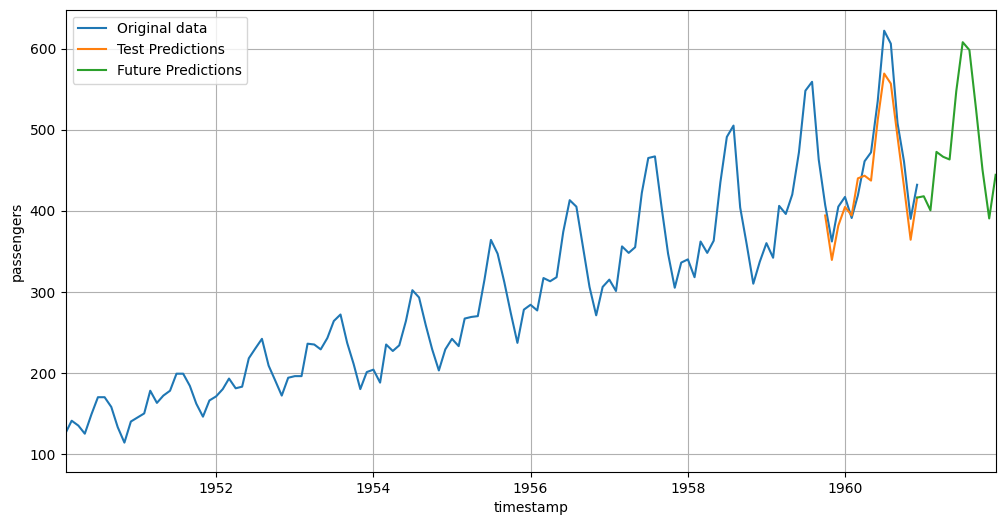

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='timestamp', y='passengers', label='Original data')
sns.lineplot(x=test.timestamp, y=predicted, label='Test Predictions')
sns.lineplot(x=new_test.timestamp, y=new_predicted, label='Future Predictions')
plt.xlim([df.timestamp[new_test.index.size], new_test.timestamp[new_test.index.size-1]])
plt.grid(True)
plt.show()